In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef


In [3]:
path = "/content/drive/MyDrive/Machine learning presen/log2.csv"
if_data = pd.read_csv(path)

In [4]:

def Model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

  #train model
  model = KNeighborsClassifier(n_neighbors = 7)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #classification report
  
  print("Classification report : \n", classification_report(y_test, y_pred))
  print("AucRoc Score : ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
  print("Mathew Correlation Coefficient : ", matthews_corrcoef(y_test, y_pred))

In [5]:
if_data = shuffle(if_data, random_state=1)
Model(if_data.drop("Action", axis=1), if_data["Action"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      0.99      0.99     11318
        deny       0.98      0.99      0.98      4489
        drop       1.00      1.00      1.00      3825
  reset-both       0.00      0.00      0.00        28

    accuracy                           0.99     19660
   macro avg       0.74      0.75      0.74     19660
weighted avg       0.99      0.99      0.99     19660

AucRoc Score :  0.9049206767418856
Mathew Correlation Coefficient :  0.9867376509216731


In [6]:
if_data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
12284,4296,53,43153,53,allow,217,86,131,2,30,1,1
64627,53771,37965,0,0,deny,66,66,0,1,0,1,0
41220,56842,24233,12414,24233,allow,70,70,0,2,8,2,0
32498,50037,53,63751,53,allow,195,102,93,2,31,1,1
1131,51443,53,51443,53,allow,217,87,130,2,31,1,1


In [7]:
if_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [8]:
if_data['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [9]:
if_data.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

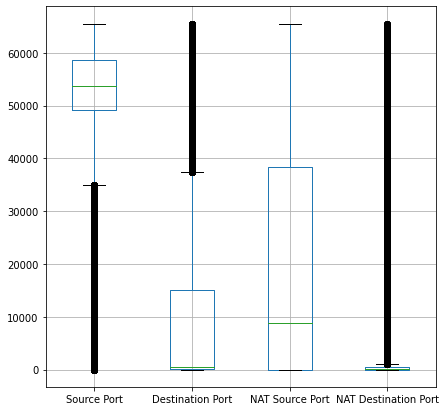

In [10]:
plt.figure(figsize=(7, 7))
if_data[['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']].boxplot()
plt.show()

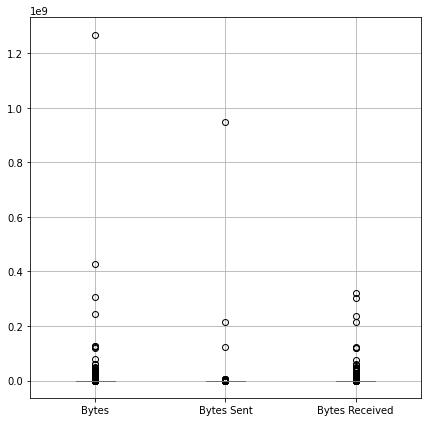

In [11]:
plt.figure(figsize=(7, 7))
if_data[['Bytes', 'Bytes Sent', 'Bytes Received']].boxplot()
plt.show()

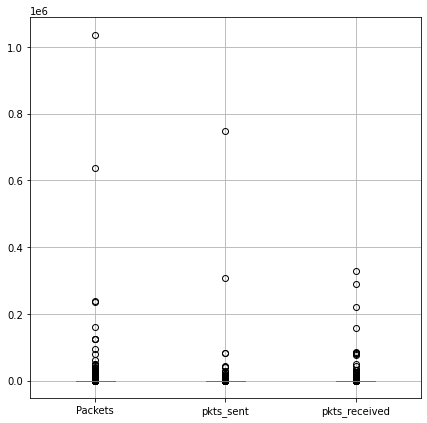

In [12]:
plt.figure(figsize=(7, 7))
if_data[['Packets', 'pkts_sent', 'pkts_received']].boxplot()
plt.show()

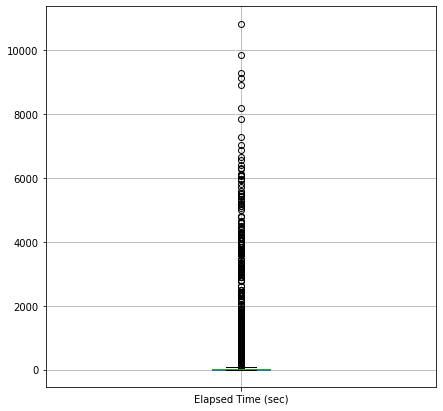

In [13]:
plt.figure(figsize=(7, 7))
if_data[['Elapsed Time (sec)']].boxplot()
plt.show()

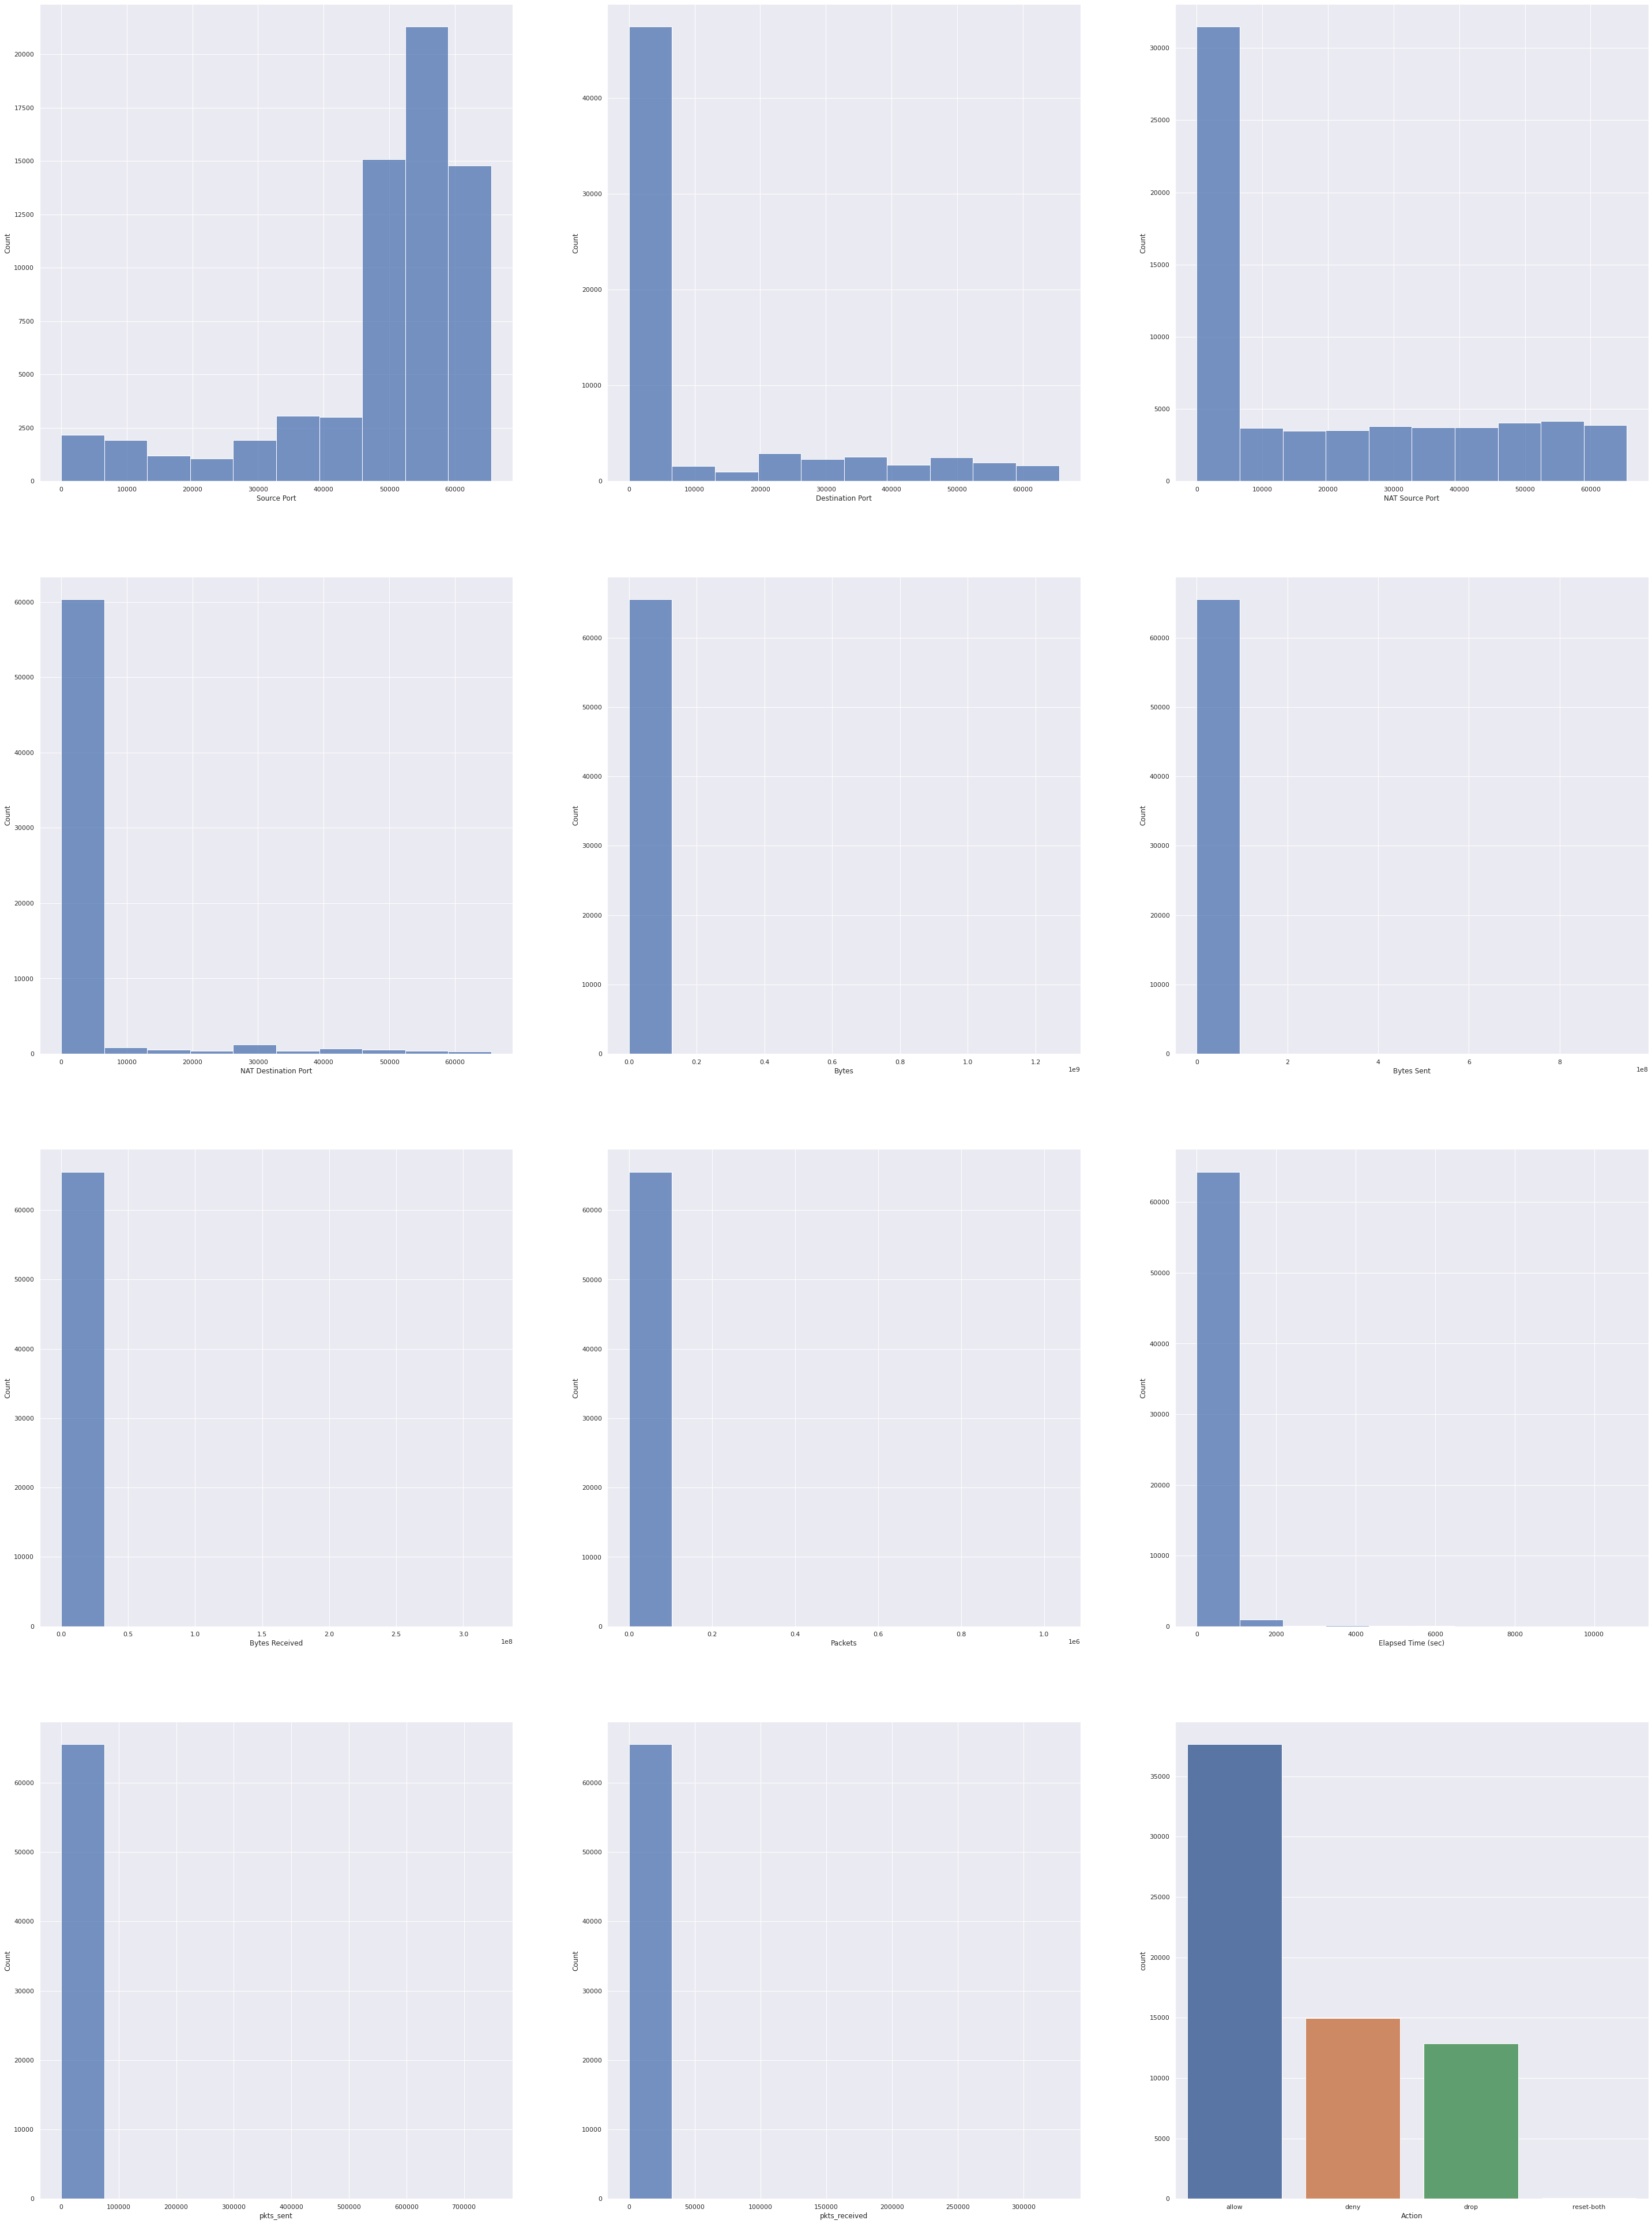

In [14]:
sns.set(rc = {'figure.figsize':(50,70)})
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3)
axes = [ax1, ax2, ax3,ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]
columns = if_data.columns
columns = columns.delete(4)
for i in range(len(axes)):
  sns.histplot(data=if_data, x=columns[i], bins=10, ax=axes[i])
sns.countplot(data=if_data, x='Action', ax=ax12)

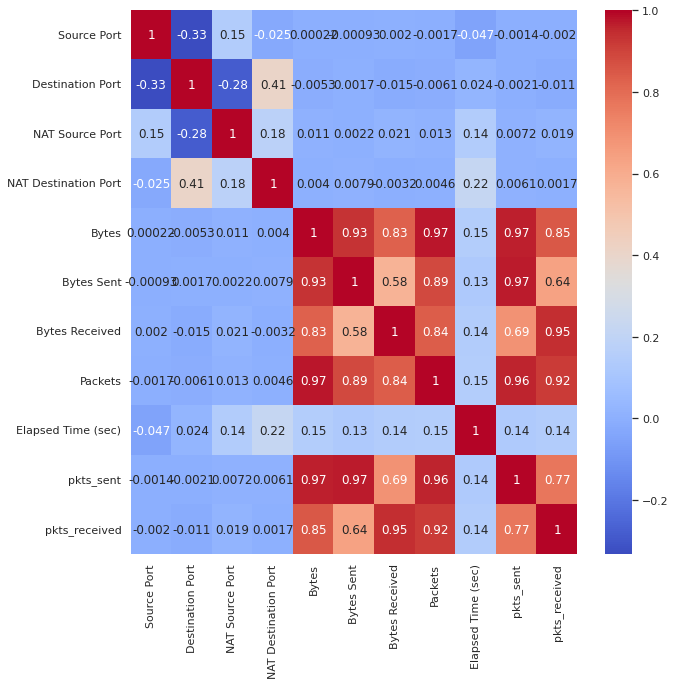

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(if_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
print("Number of duplicate records : ",if_data.duplicated().sum())
#drop duplicates
if_data.drop_duplicates(inplace=True)
print("Number of duplicate records(After drop) : ",if_data.duplicated().sum())

Number of duplicate records :  8362
Number of duplicate records(After drop) :  0


In [17]:
Model(if_data.drop("Action", axis=1), if_data["Action"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      0.99      1.00     11188
        deny       0.97      0.98      0.98      2459
        drop       1.00      1.00      1.00      3494
  reset-both       0.00      0.00      0.00        10

    accuracy                           0.99     17151
   macro avg       0.74      0.74      0.74     17151
weighted avg       0.99      0.99      0.99     17151

AucRoc Score :  0.9233753677940305
Mathew Correlation Coefficient :  0.9873902362920995


In [18]:
#remove highly correlated features
threshold = 0.8
cor_mat = if_data.corr().abs()
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
print(to_drop)
if_data = if_data.drop(to_drop, axis=1)

['Bytes Sent', 'Bytes Received', 'Packets', 'pkts_sent', 'pkts_received']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [19]:
Model(if_data.drop("Action", axis=1), if_data["Action"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      0.99      1.00     11188
        deny       0.97      0.98      0.98      2459
        drop       1.00      1.00      1.00      3494
  reset-both       0.00      0.00      0.00        10

    accuracy                           0.99     17151
   macro avg       0.74      0.74      0.74     17151
weighted avg       0.99      0.99      0.99     17151

AucRoc Score :  0.923368030088116
Mathew Correlation Coefficient :  0.986361608699425


In [20]:
#apply normalization
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
col1s = if_data.columns.drop('Action')
if_data[col1s] = qt.fit_transform(if_data[col1s])
if_data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Elapsed Time (sec)
12284,-2.123530,-1.061248,0.714362,-0.035170,allow,0.209822,0.359209
64627,-0.034044,1.303557,-5.199338,-5.199338,deny,-1.149133,-5.199338
41220,0.445061,0.979857,-0.093138,1.532252,allow,-0.617243,-0.259057
32498,-0.508237,-1.061248,2.092163,-0.035170,allow,0.037684,0.704756
1131,-0.301947,-1.061248,1.033987,-0.035170,allow,0.209822,0.704756


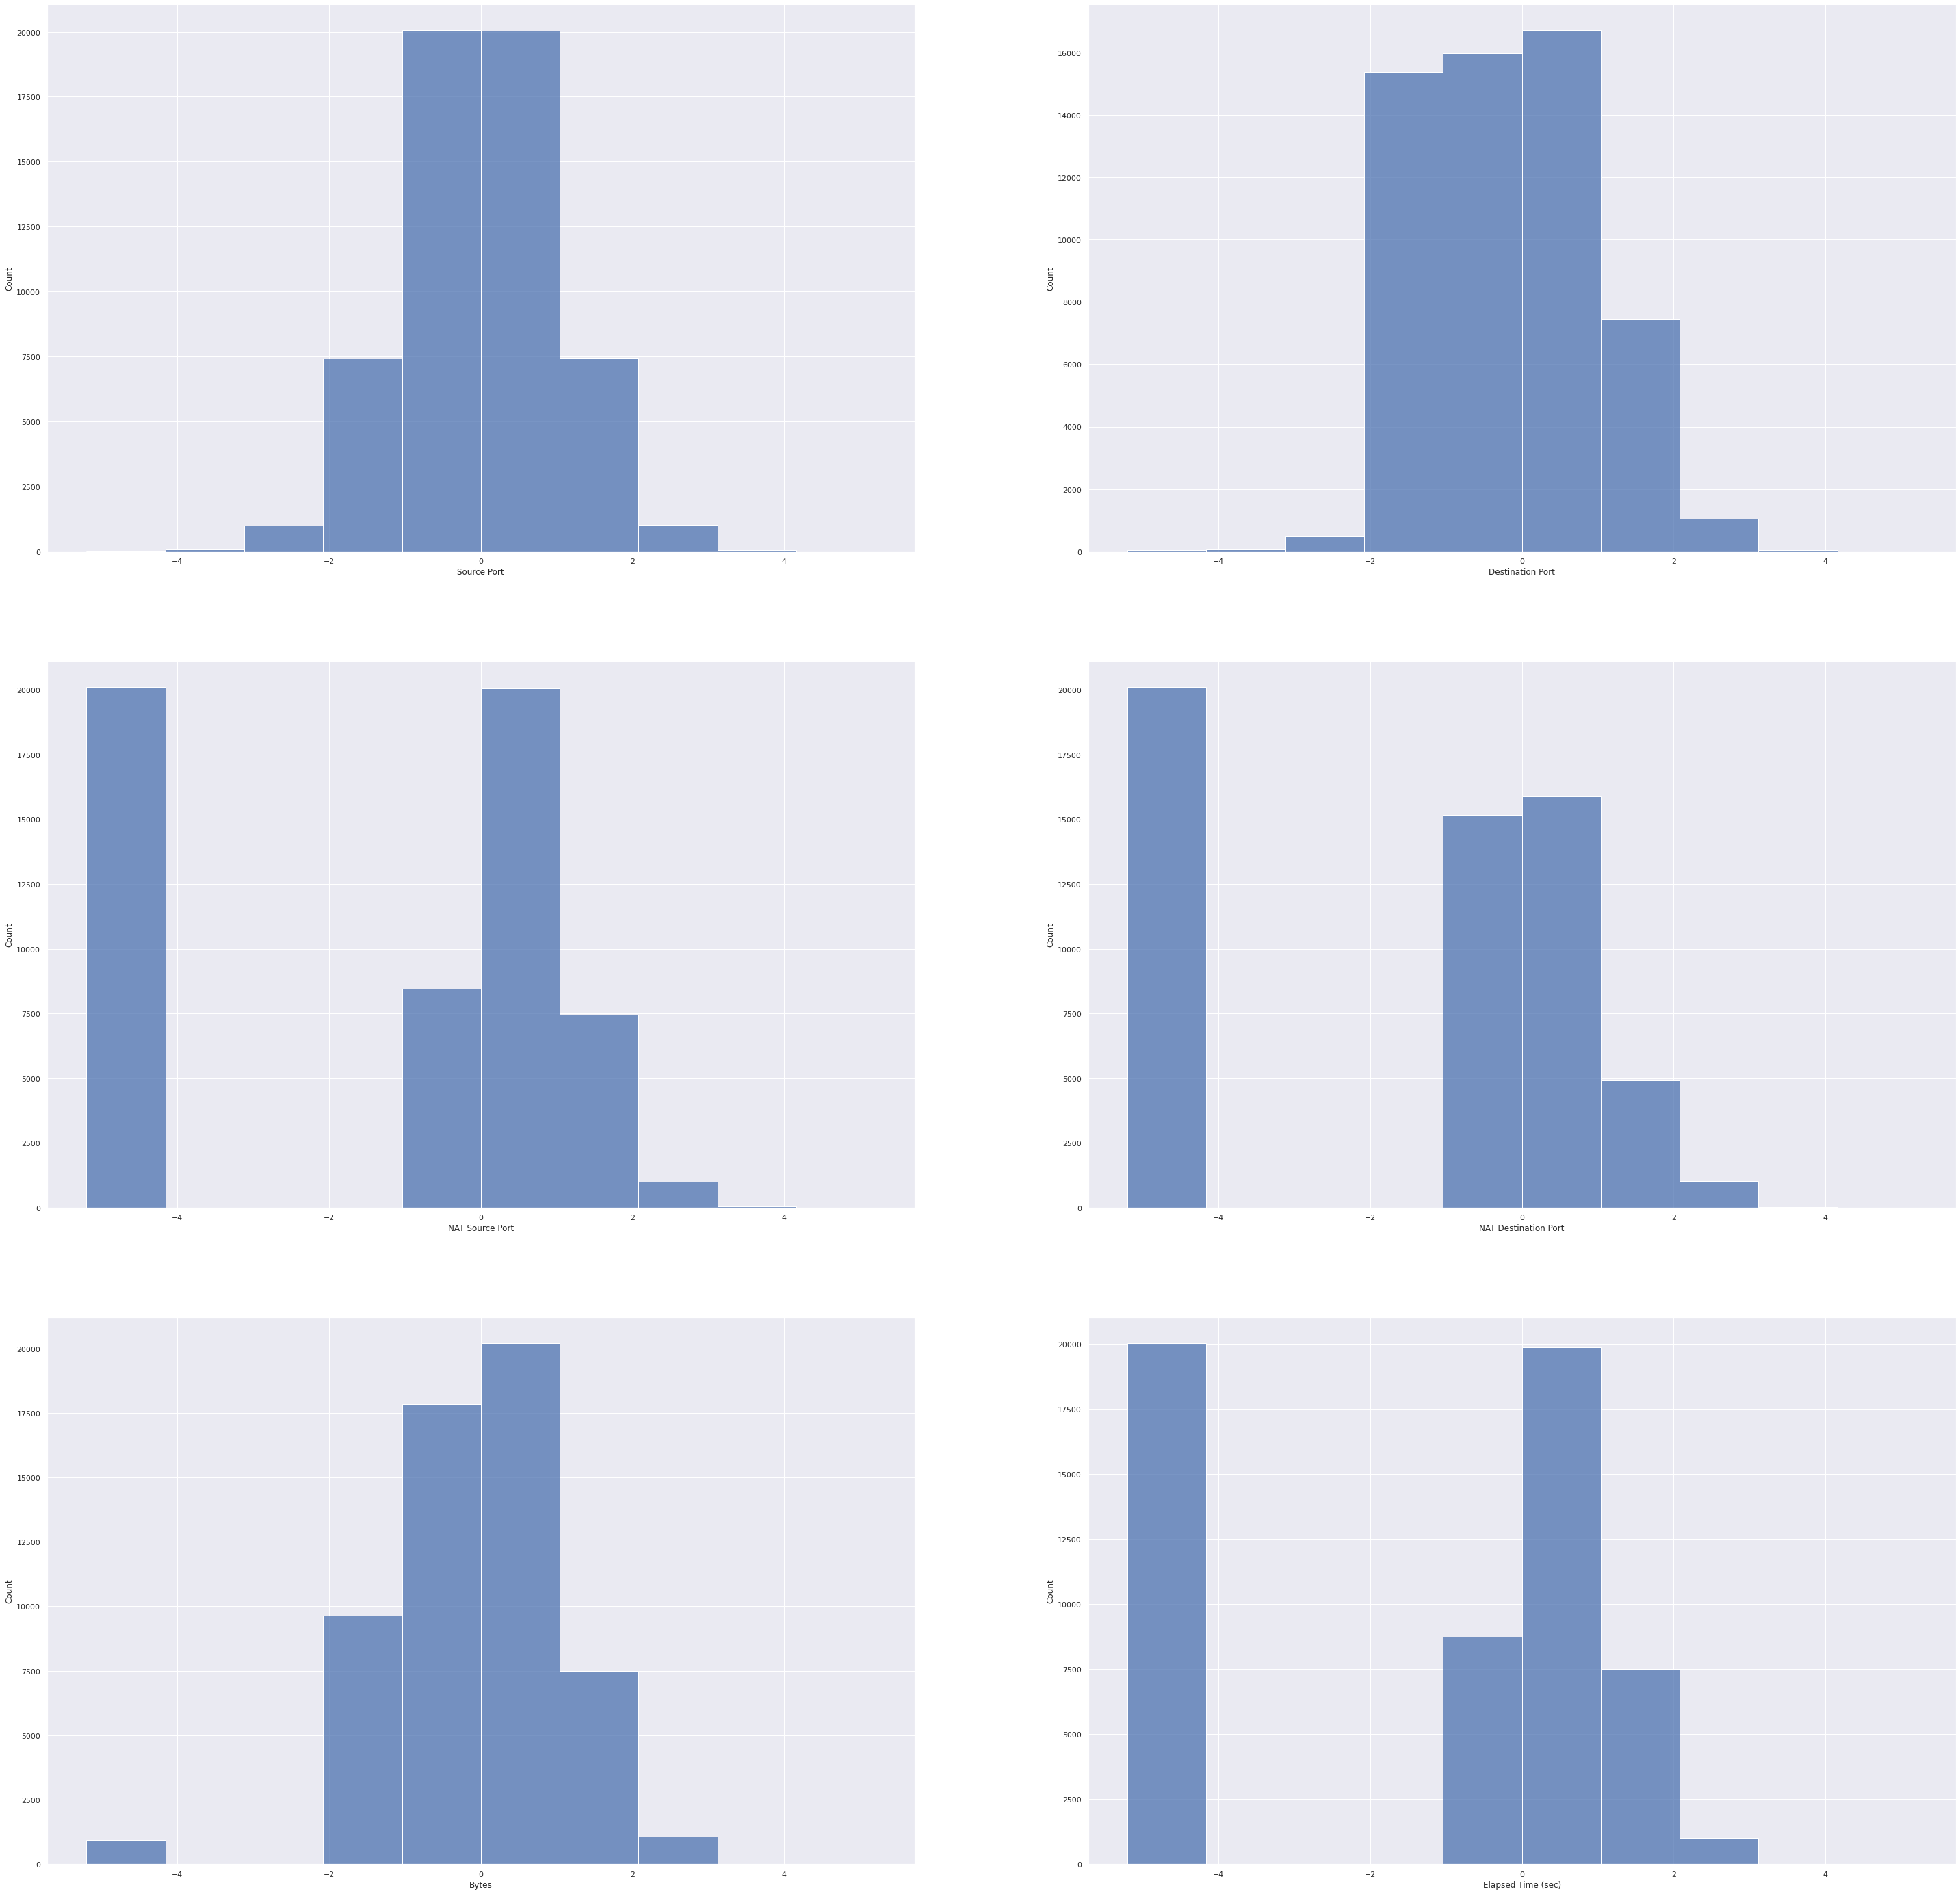

In [21]:
sns.set(rc = {'figure.figsize':(50,50)})
fig, ((ax1, ax2),(ax3, ax4) ,(ax5, ax6)) = plt.subplots(3, 2)
axes = [ax1, ax2, ax3,ax4, ax5, ax6]
columns = if_data.columns
columns = columns.delete(4)
for i in range(len(axes)):
  sns.histplot(data=if_data, x=columns[i], multiple='stack', bins=10, ax=axes[i])

In [22]:
Model(if_data.drop("Action", axis=1), if_data["Action"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11188
        deny       1.00      1.00      1.00      2459
        drop       1.00      1.00      1.00      3494
  reset-both       0.00      0.00      0.00        10

    accuracy                           1.00     17151
   macro avg       0.75      0.75      0.75     17151
weighted avg       1.00      1.00      1.00     17151

AucRoc Score :  0.9614503336971016
Mathew Correlation Coefficient :  0.9974961733455713


In [23]:
#remove ouliers
cols = if_data.columns.drop(['Action', 'Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port'])
for i in cols:
  q75,q25 = np.percentile(if_data.loc[:,i],[75,25])
  intr_qr = q75-q25
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
  if_data.loc[if_data[i] < min,i] = np.nan
  if_data.loc[if_data[i] > max,i] = np.nan
if_data.dropna(axis=0, inplace=True)

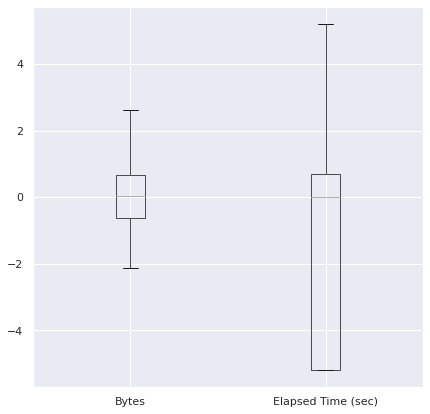

In [24]:
plt.figure(figsize=(7, 7))
if_data[cols].boxplot()
plt.show()

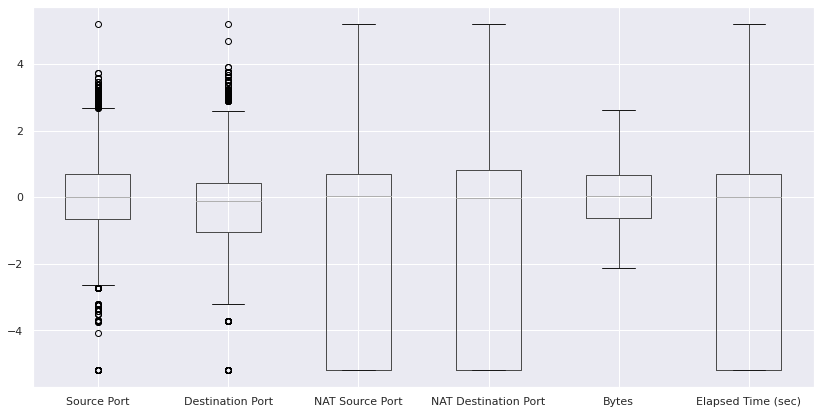

In [25]:
plt.figure(figsize=(14, 7))
if_data.boxplot()
plt.show()

In [26]:
Model(if_data.drop("Action", axis=1), if_data["Action"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report : 
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11059
        deny       0.99      0.99      0.99      2220
        drop       1.00      1.00      1.00      3502
  reset-both       0.00      0.00      0.00        13

    accuracy                           1.00     16794
   macro avg       0.75      0.75      0.75     16794
weighted avg       1.00      1.00      1.00     16794

AucRoc Score :  0.9120721528115513
Mathew Correlation Coefficient :  0.9967009303441887


In [27]:
#resampling of data
from imblearn.over_sampling import SMOTE

X = if_data.drop("Action", axis=1)
y = if_data["Action"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Before Resampling:\n", y_train.value_counts())

#resample only train data
n = y_train.value_counts()["reset-both"]
over = SMOTE()
X_train_res, y_train_res = over.fit_resample(X_train, y_train)

#shuffle data
X_train_res, y_train_res = shuffle(X_train_res, y_train_res, random_state=1)
print("\nafter Resampling:\n", y_train_res.value_counts())

Before Resampling:
 allow         26092
drop           8133
deny           4919
reset-both       41
Name: Action, dtype: int64

after Resampling:
 drop          26092
allow         26092
deny          26092
reset-both    26092
Name: Action, dtype: int64


In [28]:
model = KNeighborsClassifier(n_neighbors=7)

#train model
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

#classification report
report = classification_report(y_test, y_pred)
print("Classification report : \n", report)
print("AucRoc Score : ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
print("Mathew Correlation Coefficient : ", matthews_corrcoef(y_test, y_pred))

Classification report : 
               precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11059
        deny       0.99      0.95      0.97      2220
        drop       1.00      1.00      1.00      3502
  reset-both       0.05      0.38      0.08        13

    accuracy                           0.99     16794
   macro avg       0.76      0.83      0.76     16794
weighted avg       1.00      0.99      0.99     16794

AucRoc Score :  0.9177956249083948
Mathew Correlation Coefficient :  0.9847822678403109


In [29]:
#hyperparameters tuning
from sklearn.model_selection import GridSearchCV
hyperparameters = dict(n_neighbors=list(range(3, 30, 2)))
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)
best_model = clf.fit(if_data.drop("Action", axis=1), if_data["Action"])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 7
